最近在上开课吧人工智能学院，第六期计算机视觉的课程。讲师讲了线性回归与逻辑回归，我吸收了之后，也有自己的理解，我想show一下！哈哈哈～   
那就从我有一个房子开始吧～ 最近想去大城市闯荡，需要钱，我想卖掉老家的房子。我知道自己的房子150平米，我想预估这个房子的价格。我就去卖房子的网站去看别人的房子都是什么样的价格。刚开始我很单纯，只关注了一个点，就是房子的面积和价格。  
我收集了以下数据：（100平米，350万）（200平米，650万），就想自己的房子应该介于350万到650万之间。      
我是学习过数学嘛，想到 $y = ax + b$ ,根据两个数据的规律得到以下经验：      
房子价格 = 3 ✖️房子的面积 + 50。    
那我把自己房子的面积带入，那价格应该是500万。            
       
以上过程，进一步理解。关于收集来的简单数据可看作数据集，简单记为（$x$ ,$y$）。        
房子的面积可看作特征。     
线性方程中的 $a$、$b$ 可看作参数，根据数据求得 $a$、$b$，可看作求参数的过程，也可称作训练过程。训练所用的数据又是训练集。   
房子的价格能影响参数的值，这样的影响，可看作有监督的过程，房子的价格监督 $a$、$b$ 求解的过程。    
函数【房子价格 = 3 ✖️房子的面积 + 50】 可看作一个模型，带入新的数据【房子的面积】可知道该房子的价格。

那当我收集10个数据的时候呢？
  

|  房子面积   | 房子价格  |
|  ----  | ----  |
| 50         | 150      |
| 80         | 200      |
| 100        | 350      |
| 120        | 400      |
| 160        | 500      |
| 180        | 600      |
| 200        | 650      |
| 250        | 700      |

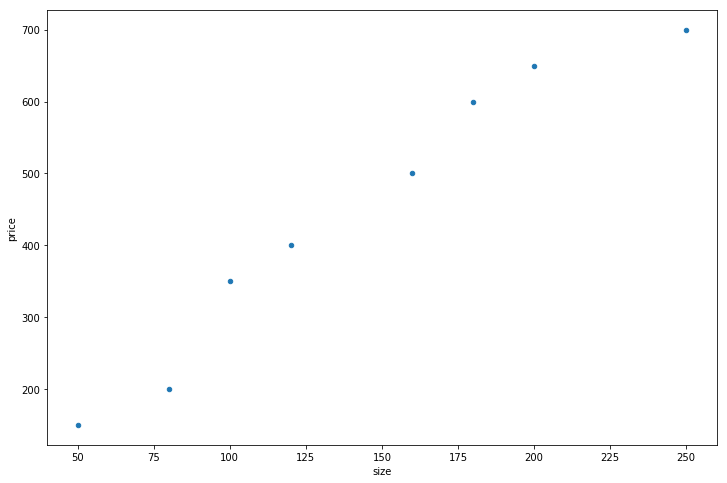

In [14]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.DataFrame({'size': [50, 80, 100, 120, 160, 180, 200, 250],
                     'price': [150, 200, 350, 400, 500, 600, 650, 700]})

data.plot(kind='scatter', x = 'size', y = 'price', figsize = (12,8))

现在继续使用一条直线去靠近这些点，便以下的图示过程，可称作拟合的过程。  
用红色的线记录同一个横轴下直线与点的差异。
当所有红色的线累计到最短的时候，便是拟合效果最好的时候。   
我们将绿色直线的值记为 $\hat y$。那 $|\hat y - y|$ 表示拟合直线与真实值的误差(Error)，即是红色的线。则所有数据的平均绝对误差（Mean Absolute Error，MAE），若有$m$个数据，第$i$个数据下的真实值表示为$y^i$,拟合曲线在第个值下的值为 $ \hat y^i$, MAE表示为：
$$ MAE = \frac 1m\sum_{i=1}^m | \hat y^i - y^i | $$
同样，考虑到拟合直线与真实值的面积误差，称之为 Mean Squared Error（MSE），表达式如下：
$$ MSE = \frac {1}{2m}\sum_{i=1}^m ( \hat y^i - y^i )^2 $$
这样，我们的目标是希望拟合直线与真实值的误差最小，可以选择MSE或者MAE，监督参数的求解,这样的MSE/MAE的函数，又称为损失函数/期望函数/目标函数（(cost/loss/target function)）。
#### 那如何求解参数呢？
那选择MSE作为监督的函数    
cost function = MSE   
目标是希望 MSE 越小越好，如何让MSE越来越小呢？也就是随机调整参数 $a$、$b$，观察 cost function的值，监督参数 $a$、$b$ 的调整。  
随机调整参数有点佛系，比较耗时。有没有谁能指点方向，让参数求解faster呢？   
开课吧人工智能数学基础课上，讲师提到，梯度的方向是函数变化最快的方向。那梯度可用于参数求解。以下是CV讲师给出了如何求参数的过程。

那在我们这里呢？   

Hypothesis (拟合的直线) ： $ y = ax + b$    

Parameters (参数) ： $a,b$   

Cost Func (损失函数) ：  $ Cost(a,b) =  \frac {1}{2m}\sum_{i=1}^m ( \hat y^i - y^i )^2 $   

Goal ：$\min_{a,b}Cost(a,b)$   

##### 梯度下降
- 首先对 $a$、$b$ 赋值，这个值可以是随机的，也可以是一个零向量；  
- 改变 $a$、$b$ 的值，使得 $ Cost(a,b) $ 按梯度下降的方向进行减少；  
- 当 $ Cost(a,b) $  下降到无法下降时为止，这时  $ Cost(a,b) $ 对 $ a,b $ 的导数为0.
以上的参数是怎么改变的呢？
$$ temp0 = a - \lambda \frac{\partial }{\partial a} Cost(a,b)$$

$$ temp1 = b - \lambda \frac{\partial }{\partial b} Cost(a,b)$$

$$ a := temp0 $$

$$ a := temp1 $$
$ \lambda $ 是步长，也被成为学习率，凭经验值。   
$ \frac{\partial }{\partial a} Cost(a,b) ,\frac{\partial }{\partial b} Cost(a,b)$ 是多少呢？
$$ \frac{\partial }{\partial a} Cost(a,b) = \frac {1}{m}\sum_{i=1}^m (\hat y^i - y^i ) x $$ 
$$ \frac{\partial }{\partial b} Cost(a,b) = \frac {1}{m}\sum_{i=1}^m (\hat y^i - y^i) $$ 

参数求解之后，带入拟合的直线，拟合的直线可以对新的数据进行预测。现在进入代码实践的过程～

In [15]:
# inference 拟合的直线 y_hat
def inference(a,b,x):
    y_hat = a * x + b
    return y_hat

In [16]:
# cost function
def eval_loss(a,b,x_list,gt_y_list):
    avg_loss = 0
    for i in range(len(x_list)):
        avg_loss += 0.5 * (a * x_list[i] + b - gt_y_list[i]) ** 2
    avg_loss /= len(gt_y_list)
    return avg_loss

In [17]:
# 一个数据的梯度
def gradient(y_hat, gt_y, x):
    diff = y_hat - gt_y
    da = diff * x
    db = diff
    return da,db

In [23]:

def cal_step_gradient(x_list, gt_y_list, a, b ,lr):
    avg_da, avg_db = 0, 0
    x_number = len(x_list)
    for i in range( len(x_list)):
        y_hat = inference(a, b, x_list[i])
        da, db = gradient(y_hat, gt_y_list[i], x_list[i])
        avg_da += da
        avg_db += db
    avg_da /= x_number
    avg_db /= x_number
    a -= lr * avg_da
    b -= lr * avg_db
    return a,b

In [19]:
def train(x_list, gt_y_list, lr, max_iter):
    a = 0
    b = 0
    num_samples = len(x_list)
    for i in range(max_iter): 
        a, b = cal_step_gradient(x_list, gt_y_list, a, b, lr)
        print('a:{0},b:{1}'.format(a,b))
        print('loss is {}'.format(eval_loss(a,b,x_list,gt_y_list)))
        time.sleep(0.1)
        
    return a,b

In [31]:
import time
train(data['size'], data['price'],0.1, 4)

w:7493.75,b:44.375
loss is 679678972650.5859
w:-18139254.21875,b:-106701.625
loss is 3.9856838565820764e+18
w:43925732082.609375,b:258388385.52968752
loss is 2.337232202675229e+25
w:-106369842265038.64,b:-625709132585.832
loss is 1.3705689075667437e+32


(-106369842265038.64, -625709132585.832)

In [20]:
data['size']

0     50
1     80
2    100
3    120
4    160
5    180
6    200
7    250
Name: size, dtype: int64